### Problem Statement
How do you determine if you are investing in the right neighbourhood that will be very lucrative? Buying an investment property in the wrong neighbourhood can affect your cash flow and cost you more money than expected.

You are consulting for a real estate company that has a niche in purchasing properties to rent out short-term as part of their business model specifically within New York City. The real estate company has already concluded that two bedroom properties are the most profitable; however, they do not know which zip codes are the best to invest in.

The real estate company has engaged your firm to build out a data product and provide your conclusions to help them **understand which zip codes would generate the most profit on short term rentals within New York City**.

You will be looking at publicly available data from Zillow and AirBnB: 
* Cost data: Zillow provides us an estimate of value for two-bedroom properties
* Revenue data: AirBnB is the medium through which the investor plans to lease out their investment property. Fortunately for you, we are able to see **how much properties in certain neighborhoods rent out for in New York City** 
* You can assume an **occupancy rate of 75%** or you can come up with your own model to calculate occupancy; just let us know how you came to that calculation

After meeting with the strategy team, you’ve got an idea of where to start, key concerns, and how you can help this real estate company with the market data while keeping the following **assumptions** in mind:
* The investor will pay for the property in cash (i.e. no mortgage/interest rate will need to be accounted for). 
* The time value of money discount rate is 0% (i.e. \$1 today is worth the same 100 years from now). 
* All properties and all square feet within each locale can be assumed to be homogeneous (i.e. a 1000 square foot property in a locale such as Bronx or Manhattan generates twice the revenue and costs twice as much as any other 500 square foot property within that same locale.)

There are three tasks need to do first:
1. **Quality Check** – bad data is worse than no data at all
 - Understand the data while keeping your final output in mind
 - Highlight two to three data quality insights based on your analysis of the data
 - Create metadata for any derived fields or metrics used to complete your analysis
2. **Data munging** – get the data
 - The datasets do have different units of time – in order to complete the analysis, you will need to determine a common unit of time
 - Write a function that can link the data together in a scalable way when new data is available or for when we are ready to approach a new market
3. **Craft a visual data narrative** 
 - Visualize metrics for profitability on short term rentals by zip code
 - Summarize your key insights and conclusions based on the data and your analysis
4. **What’s Next** – We recognize that 4 hours isn’t a lot of time… and you’ve probably come up with a number of great ideas from an analytical or visualization perspective that you don’t have time to do. Tell us (but don’t do any work) what you would/could do next to inform a better decision or deliver a better product to the real estate company.

### Solution Ideas/steps:
Since we want to know the most profit area in New York City, we should define some metrics to illustrate profitability at first. Metrics such as cash_flow(rent-property expense), Capitalization Rate(cap_rate = net_operating_income/house_price), Rental_income, Occupancy_rate(time_occupied/time_vacant)
Notice the cost(from zillow estimate) are the average house price for this area from 1996 to 2017; while revenue is generated by each house per day. In order to calculate the cap_rate of each area, we need to aggragate revenue for each area.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airbnblist_df = pd.read_csv("E:\\update\\Interviews\\capitalone\\listings.csv", header = 0)
zip_2bedroom_df = pd.read_csv("E:\\update\\Interviews\\capitalone\\Zip_2bedroom.csv", header = 0)

c:\users\tianyi fang\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(airbnblist_df.shape)
air_var = airbnblist_df.columns
print(air_var)
airbnblist_df.head(3)

(40753, 95)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7949480,https://www.airbnb.com/rooms/7949480,20170502132028,2017-05-03,City Island Sanctuary relaxing BR & Bath w Par...,Come relax on City Island in our quiet guest r...,"On parle français et anglais, (lire Français c...",Come relax on City Island in our quiet guest r...,none,City Island is a unique sanctuary in New York ...,...,10.0,f,NaN,NaN,f,moderate,t,t,1,1.59
1,16042478,https://www.airbnb.com/rooms/16042478,20170502132028,2017-05-04,WATERFRONT STUDIO APARTMENT,My place is close to Sea Shore. You’ll love my...,(URL HIDDEN),My place is close to Sea Shore. You’ll love my...,none,(URL HIDDEN),...,NaN,f,NaN,NaN,t,flexible,f,f,1,NaN
2,1886820,https://www.airbnb.com/rooms/1886820,20170502132028,2017-05-04,Quaint City Island Community.,Quiet island boating town on Long Island Soun...,"Master bed with queen bed, full bath and offi...",Quiet island boating town on Long Island Soun...,none,Small New England type town in the middle of ...,...,NaN,f,NaN,NaN,f,strict,f,f,1,NaN


In [14]:
print(zip_2bedroom_df.shape)
zip_2bedroom_df.head()

(8946, 262)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700


### Data cleaning

* Zip_2bedroom_df:
Since we are mainly focusing on analyzing which zipcode area can generate more profits in NewYork city, so extract zillow cost records of properties in New York City in zip_2bedroom_df. We notice that among the variables of zip_2bedroom_df, first 7 variables are region information, the last 255 variables are cost records from 1996-04 to 2017-01. 
* airbnblist_df:
There are 95 variables in airbnblist_df. Since we only care about occupation rate of each property(first use 75%, if have extra time, try to build own occupation model) and how much properties are rent out in that region, we can extract those relative variables only. 

**Assumptions:**
When extract records for New York City, I find there are city/Metro/Market have value: New York. Do they exactly mean New York City? According to Wikipedia, New York City includes five boroughs:'Brooklyn', 'Queens', 'Manhattan', 'The Bronx','Staten Island'. In the zip_2bedroom_df, there are 25 records of properties at New York City, while in airbnblist_df, there are City value of New York, Market value of New York. **I assume New York City is those area with city value in the above five boroughs in New York Market and at NY state.**
#### 1.Extraction

In [72]:
#Extract records of NY city, now we have value in City as New York and Metro as New York. Check City first
#zip_2bedroom_df[zip_2bedroom_df.City == "New York"]
#ny_cost_df = zip_2bedroom_df[zip_2bedroom_df.Metro == "New York" & zip_2bedroom_df.State =='NY']
print(zip_2bedroom_df[zip_2bedroom_df.City == "New York"].shape)# only 25 records of New York as City
#check Metro as New York
print(zip_2bedroom_df[zip_2bedroom_df.Metro == "New York"].shape) #264 records of New York as Metro
zip_2bedroom_df[zip_2bedroom_df.Metro == "New York"].sample(8) #Metro also including nearby cities in NJ state
#check New York as Metro in NY state
print(zip_2bedroom_df[(zip_2bedroom_df.State == "NY")&(zip_2bedroom_df.Metro == "New York")].shape)# 156 records
zip_2bedroom_df[(zip_2bedroom_df.State == "NY")&(zip_2bedroom_df.Metro == "New York")].sample(8)
zip_2bedroom_df[(zip_2bedroom_df.City.isin(["New York", 'Brooklyn', 'Queens', 'Manhattan', 'The Bronx','Staten Island']))&(zip_2bedroom_df.State == "NY")].shape
#ny_cost_df.sample(10)

(25, 262)
(264, 262)
(156, 262)


(25, 262)

In [4]:
ny_cost_df = zip_2bedroom_df[(zip_2bedroom_df.City.isin(["New York", 'Brooklyn', 'Queens', 'Manhattan', 'The Bronx','Staten Island']))&(zip_2bedroom_df.State == "NY")].drop(['RegionID','Metro','CountyName'], axis = 1)

In [5]:
ny_cost_df.rename(columns={'RegionName': 'zipcode'}, inplace= True)
ny_cost_df = ny_cost_df.set_index('zipcode')

In [131]:
ny_zip = ny_cost_df.index
ny_cost_df.head()

,City,State,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
zipcode,,,,,,,,,,,,,,,,,,,,,
10025,New York,NY,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
10023,New York,NY,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
10128,New York,NY,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1526000,1523700,1527200,1541600.0,1557800,1582900,1598900,1646100,1720500,1787100
10011,New York,NY,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
10003,New York,NY,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1932800,1930400,1937500,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000


In [132]:
ny_zip

Int64Index([10025, 10023, 10128, 10011, 10003, 11201, 11234, 10314, 11215,
            10028, 10021, 10014, 10036, 11434, 10306, 10312, 10022, 11217,
            10013, 11231, 10304, 10305, 10309, 10308, 10303],
           dtype='int64', name='zipcode')

There are 25 property value records in NYC being extracted.

Then extract the airbnb_data(revenue) for NYC
#extract possible useful variables first
#1. Demographic and behavior information about hosts: id, url, name, location/response, acceptance, vertify.. etc. not so important
#2. Information about property: location, neighbourhood, structure_features, operation_fee(cleaning, security)
but since we don't have clear definition of cleaning fee and security deposit(like weekly/per_order). The gross_income is what I used to calculate the cap_rate
#3. Revenue: price(daily, weekly, monthly)
#4. Availablity, can calculate the occupancy rate(availability_365/365), but if assume 75%, then this information is not needed.
#5. Reviews: indicates the popularity, can use review_scores_value as total value, or average all review_scores.(10)

In [245]:
#occupancy_rate
aval_df = airbnblist_df[['zipcode', 'availability_30', 'availability_60', 'availability_90','availability_365']]
aval_df = aval_df[aval_df.zipcode.isin(ny_zip)]

,zipcode,availability_30,availability_60,availability_90,availability_365
16553,11217,1,2,2,175
16554,11217,29,59,89,89
16555,11231,3,5,12,250
16556,11217,6,17,34,300
16557,11215,0,0,0,0
16558,11217,0,0,0,275
16559,11217,0,0,0,0
16560,11215,0,0,0,0
16561,11215,0,0,19,19
16562,11215,18,48,78,348


In [246]:
aval_df = aval_df.set_index('zipcode')

In [258]:
aval_df = aval_df.loc[(aval_df!=0).any(1)]
occupancy_rate = aval_df.groupby('zipcode')['availability_365'].agg('mean')/365
occupancy_rate

zipcode
10003.0    0.502762
10011.0    0.325644
10013.0    0.523373
10014.0    0.454429
10023.0    0.342466
10025.0    0.079452
10036.0    0.531213
10303.0    0.749315
10306.0    0.665753
10308.0    0.560731
10312.0    0.538813
11201.0    0.317186
11215.0    0.587973
11217.0    0.472265
11231.0    0.328767
11434.0    0.771720
Name: availability_365, dtype: float64

In [31]:
#Airbnb data of NY
rough_ar_df = airbnblist_df[['id', 'host_id', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'is_location_exact','price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'availability_365', 'number_of_reviews',
       'review_scores_value', 'reviews_per_month']]
#notice the neighbourhood is the smaller area mapping with zipcode, while neighbourhood_group is the large area. 

In [235]:
rough_ar_df.sample(5)

,id,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,is_location_exact,price,weekly_price,monthly_price,security_deposit,cleaning_fee,availability_365,number_of_reviews,review_scores_value,reviews_per_month
5720,7748135,36564046,Bushwick,Brooklyn,Brooklyn,NY,11206,New York,t,$60.00,NaN,NaN,NaN,NaN,0,7,10.0,0.36
1097,18404432,104170260,Astoria,Queens,Queens,NY,11356,New York,t,$129.00,NaN,NaN,NaN,NaN,14,0,NaN,NaN
35552,11721727,62335395,Washington Heights,Manhattan,New York,NY,10033,New York,t,$360.00,NaN,NaN,NaN,NaN,0,0,NaN,NaN
29576,6789459,20687661,Rockaway Beach,Queens,Far Rockaway,NY,11693,New York,f,$105.00,$500.00,NaN,$100.00,NaN,21,49,10.0,2.13
27188,18240423,48508671,Midwood,Brooklyn,Brooklyn,NY,11230,New York,t,$85.00,NaN,NaN,NaN,NaN,358,0,NaN,NaN


In [40]:
#assume occupation rate of each property is 75%, which means we only need variables ralate to location/price
aro75_df = rough_ar_df[['id', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'is_location_exact','price', 'weekly_price', 'monthly_price',
       'review_scores_value', 'reviews_per_month']]

In [41]:
aro75_df.sample(10)

,id,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,is_location_exact,price,weekly_price,monthly_price,review_scores_value,reviews_per_month
34337,846871,Upper West Side,Manhattan,New York,NY,10024,New York,t,$131.00,NaN,NaN,9.0,2.54
22588,16544941,Hell's Kitchen,Manhattan,New York,NY,10036,New York,t,$225.00,NaN,NaN,NaN,NaN
1172,12629694,Astoria,Queens,Queens,NY,11103,Oregon Coast,t,$125.00,NaN,NaN,NaN,NaN
21881,9150647,Hell's Kitchen,Manhattan,New York,NY,10019,New York,t,$250.00,"$1,200.00","$4,800.00",NaN,0.08
5586,6937480,Bushwick,Brooklyn,Brooklyn,NY,11237,New York,t,$70.00,$450.00,"$1,400.00",10.0,0.05
20908,123784,Harlem,Manhattan,New York,NY,10027,New York,t,$110.00,$735.00,"$3,200.00",9.0,0.82
1638,9231083,Bedford-Stuyvesant,Brooklyn,Brooklyn,NY,11221,New York,f,$85.00,NaN,NaN,9.0,0.25
4161,202716,Bedford-Stuyvesant,Brooklyn,Brooklyn,NY,11216,New York,t,$110.00,NaN,NaN,9.0,1.27
32329,18290054,Upper East Side,Manhattan,New York,NY,10128,New York,t,$85.00,NaN,NaN,NaN,NaN
3685,3735483,Bedford-Stuyvesant,Brooklyn,Brooklyn,NY,11221,New York,t,$55.00,NaN,NaN,9.0,0.36


In [42]:
print('how many records of New York market?')
print(aro75_df[aro75_df.market=='New York'].shape)
print('how many records of New York market in NY state?')
print(aro75_df[(aro75_df.state == "NY")&(aro75_df.market == "New York")].shape)
print('how many records of New York market in City as New York ?')
print(aro75_df[(aro75_df.city == "New York")&(aro75_df.market == "New York")].shape)
print('how many records of New York City ?')
print(aro75_df[aro75_df.city.isin(['New York','Brooklyn', 'Queens', 'Manhattan', 'The Bronx','Staten Island'])].shape)
print('how many records of New York City in New York Market at NY state ?')
print(aro75_df[(aro75_df.city.isin(['New York','Brooklyn', 'Queens', 'Manhattan', 'The Bronx','Staten Island']))&(aro75_df.state == "NY")&(aro75_df.market == "New York")].shape)


how many records of New York market?
(40544, 13)
how many records of New York market in NY state?
(40536, 13)
how many records of New York market in City as New York ?
(19405, 13)
how many records of New York City ?
(38330, 13)
how many records of New York City in New York Market at NY state ?
(38128, 13)


In [43]:
ny_revenue_75_df = aro75_df[(aro75_df.city.isin(['New York','Brooklyn', 'Queens', 'Manhattan', 'The Bronx','Staten Island']))&(aro75_df.state == "NY")&(aro75_df.market == "New York")]

#### Imputation of NA and Aggregate Variables for both datasets
* zillow_cost_data: Since we have property value from 1996 to 2017, which is 22-year, we can get the average year value of each property. Notice only 25 zipcodes have these records.

In [260]:
#fill na with 0, since the value in those particular time is 0
ny_cost_df = ny_cost_df.fillna(0)
ny_cost_df.sample(3)

,City,State,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
zipcode,,,,,,,,,,,,,,,,,,,,,
10312,New York,NY,764,153000.0,149800.0,146900.0,144800.0,143000.0,141900.0,140900.0,...,325400,326600,328400,330300.0,333600,339300,345000,348400,351700,355000
10309,New York,NY,3682,129100.0,129200.0,129000.0,129400.0,130300.0,131200.0,131500.0,...,348300,351100,354600,357900.0,360500,364900,371100,377200,383700,390500
10028,New York,NY,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1814600,1820400,1810000,1786500.0,1787100,1801100,1847900,1922800,2015700,2083900


In [261]:
ny_cost_time_df = ny_cost_df.drop(['City', 'State', 'SizeRank'], axis = 1)
ny_cost_time_df = ny_cost_time_df.T

In [262]:
#take a look at the extracted variables of both datasets
ny_cost_time_df.sample(3)

zipcode,10025,10023,10128,10011,10003,11201,11234,10314,11215,10028,...,10312,10022,11217,10013,11231,10304,10305,10309,10308,10303
2013-07,1054900.0,1508400.0,1182500.0,1810700.0,1563900.0,937200.0,374500.0,274500.0,722400.0,1387600.0,...,293600.0,1434000.0,773700.0,2751300.0,773200.0,235900.0,302100.0,309300.0,314300.0,232700.0
2002-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178400.0,0.0,0.0,...,189200.0,0.0,0.0,0.0,0.0,162800.0,198800.0,214600.0,216600.0,160100.0
2010-05,854500.0,1309000.0,1023000.0,1462100.0,1252400.0,758900.0,392900.0,287000.0,536800.0,1175900.0,...,295100.0,1350800.0,614500.0,2282800.0,590900.0,260800.0,324500.0,313100.0,324700.0,260900.0


In [263]:
ny_cost_time_df['time'] = ny_cost_time_df.index

In [264]:
ny_cost_time_df['year'] = ny_cost_time_df['time'].str.split('-').str[0]
ny_cost_time_df = ny_cost_time_df.drop('time', axis = 1)

In [265]:
#get year value
ny_cost_year_df = ny_cost_time_df.groupby('year').agg('mean')
ny_cost_year_df.sample(8)

zipcode,10025,10023,10128,10011,10003,11201,11234,10314,11215,10028,...,10312,10022,11217,10013,11231,10304,10305,10309,10308,10303
year,,,,,,,,,,,,,,,,,,,,,
2007,9.291000e+05,1.458108e+06,1.057892e+06,1.535483e+06,1.429408e+06,3.248083e+05,411475.000000,313666.666667,497925.000000,1.369592e+06,...,320191.666667,1.472075e+06,5.394583e+05,2.112975e+06,5.521500e+05,301875.000000,347458.333333,342416.666667,351175.000000,296733.333333
2006,8.730000e+05,1.386817e+06,9.990417e+05,1.419958e+06,1.383875e+06,0.000000e+00,418633.333333,309891.666667,520233.333333,1.310592e+06,...,325116.666667,1.376600e+06,5.131833e+05,1.873158e+06,5.259167e+05,279725.000000,351075.000000,346300.000000,361225.000000,283400.000000
2016,1.359267e+06,1.926233e+06,1.525492e+06,2.278892e+06,1.934525e+06,1.338917e+06,443800.000000,316316.666667,979683.333333,1.723392e+06,...,321833.333333,1.750883e+06,1.199775e+06,3.296133e+06,1.117050e+06,278400.000000,362683.333333,344716.666667,350575.000000,279441.666667
2003,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,23425.000000,212450.000000,0.000000,0.000000e+00,...,222066.666667,0.000000e+00,0.000000e+00,0.000000e+00,3.500833e+04,186583.333333,240250.000000,242783.333333,252741.666667,192875.000000
2005,6.158167e+05,1.264158e+06,2.350417e+05,1.304342e+06,1.160517e+06,0.000000e+00,346275.000000,284150.000000,488891.666667,1.182442e+06,...,296100.000000,1.172317e+06,5.219083e+05,1.649375e+06,4.993250e+05,250433.333333,318291.666667,315883.333333,327900.000000,244975.000000
2004,0.000000e+00,4.691000e+05,0.000000e+00,4.433667e+05,4.321083e+05,0.000000e+00,321541.666667,243858.333333,313191.666667,3.159833e+05,...,252083.333333,4.441833e+05,3.314833e+05,1.328983e+06,5.031333e+05,215033.333333,273141.666667,276658.333333,285458.333333,215191.666667
1999,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,125616.666667,0.000000,0.000000e+00,...,134725.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,132508.333333,140275.000000,146716.666667,148583.333333,117733.333333
2010,8.578333e+05,1.329725e+06,1.006517e+06,1.438658e+06,1.282600e+06,7.648667e+05,389900.000000,287016.666667,548700.000000,1.199675e+06,...,294841.666667,1.372183e+06,6.149750e+05,2.278417e+06,6.004667e+05,260891.666667,322616.666667,314841.666667,324541.666667,259466.666667


c:\users\tianyi fang\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


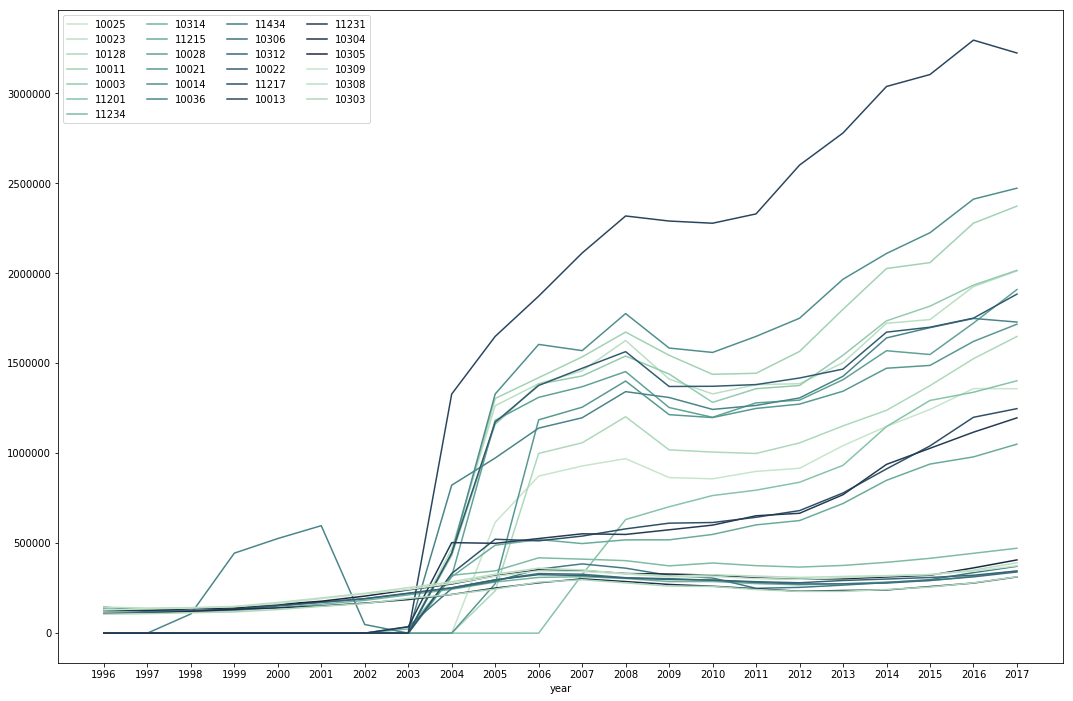

In [236]:
#plot
colors = sns.cubehelix_palette(22, rot=-0.4)
fig1, ax1 = plt.subplots(figsize = (18,12))
ax = fig.add_subplot(111)
plt.xticks(np.arange(0, 22, step=1), np.arange(1996, 2018))
ny_cost_year_df.plot(color = colors, ax = ax1)
plt.legend(ncol=4, loc='best')

From the plot, we clearly see there are several areas recently built but with rapidly increasing value, while some properties built earlier show slow increase. For the second group of properties, we can assume the property price will still slowly increase, thus the price of 2017 could be a represent of house price for those areas. While for the first group, the situation is more complicated. If the company wants to invest in this year/next year, we can still use the 2017 price. But if the investment is long-term, the trend of costs need to be predicted and taken into consideration.

In [268]:
cost_2017 = ny_cost_year_df.loc['2017']
cost_2017

zipcode
10025    1.358600e+06
10023    2.013717e+06
10128    1.648883e+06
10011    2.373500e+06
10003    2.016550e+06
11201    1.402783e+06
11234    4.719000e+05
10314    3.454500e+05
11215    1.050483e+06
10028    1.909750e+06
10021    1.717183e+06
10014    2.473150e+06
10036    1.729167e+06
11434    3.716333e+05
10306    3.400500e+05
10312    3.455000e+05
10022    1.884400e+06
11217    1.247833e+06
10013    3.224517e+06
11231    1.196583e+06
10304    3.124167e+05
10305    4.070333e+05
10309    3.746500e+05
10308    3.911333e+05
10303    3.133333e+05
Name: 2017, dtype: float64

In [253]:
#check NA
ny_cost_year_na = ny_cost_year_df.replace(0,np.nan)
ny_cost_year_na = ny_cost_year_na.isnull().sum(axis = 1)

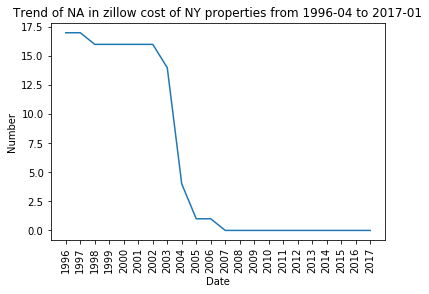

In [255]:
#here we can see there are some properties with NA value during months, which means those properties are not been built up yet. 
#ny_cost_df.drop(['City', 'State', 'SizeRank'], axis = 1).isnull().sum().plot()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Trend of NA in zillow cost of NY properties from 1996-04 to 2017-01")
plt.xlabel("Date")
plt.xticks(rotation = 'vertical')
plt.ylabel("Number")
g1 = ny_cost_year_na
plt.plot(g1)

### airbnb_revenue_data

In [168]:

ny_revenue_75_df.sample(5)

,id,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,is_location_exact,price,weekly_price,monthly_price,review_scores_value,reviews_per_month,zipcode1
10773,10069720,Crown Heights,Brooklyn,Brooklyn,NY,11216,New York,t,$200.00,NaN,NaN,NaN,NaN,11216
496,7051813,Astoria,Queens,Queens,NY,11106,New York,t,$59.00,NaN,NaN,NaN,NaN,11106
10929,7797812,Crown Heights,Brooklyn,Brooklyn,NY,11225,New York,t,$50.00,$400.00,NaN,10.0,1.00,11225
33215,1020625,Upper East Side,Manhattan,New York,NY,10075,New York,t,$249.00,"$2,500.00","$6,800.00",10.0,0.84,10075
6434,15042536,Bushwick,Brooklyn,Brooklyn,NY,11237,New York,t,$65.00,NaN,NaN,9.0,2.16,11237


In [170]:
print('How many zipcode:', len(ny_revenue_75_df.zipcode.unique()))
print('How many small neighbourhood:', len(ny_revenue_75_df.neighbourhood_cleansed.unique()))
print('How many group neighbourhood:', len(ny_revenue_75_df.neighbourhood_group_cleansed.unique()))

How many zipcode: 257
How many small neighbourhood: 177
How many group neighbourhood: 5


In [126]:
#NA at zipcode
print('how many records', ny_revenue_75_df.shape[0])
print('how many NaN zipcode', sum(ny_revenue_75_df['zipcode1'].isnull()))
nan_zip = ny_revenue_75_df[['neighbourhood_cleansed','city', 'zipcode']][ny_revenue_75_df['zipcode1'].isnull()]
#there are 8315/38128 NaN of zipcode, almost 40%. For most NaN zipcode, its the same neighbourhood in different regions?same region. 
#Check how percentage of missing zipcode for each neighbourhood
nan_zip['neighbourhood_cleansed'].value_counts()
nan_zip['city'].value_counts()

how many records 38128
how many NaN zipcode 8315


New York         5925
Brooklyn         1893
Queens            480
Staten Island      14
Manhattan           3
Name: city, dtype: int64

In [179]:
#plot_bar function
def get_bar_plot(xlabel, df):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(111)
    title = "Distribution of " + xlabel
    plt.title(title, fontsize = 18)
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    vc = df[xlabel].value_counts(dropna = False)
    vcsum = vc.sum()
    vc.plot(kind = 'bar', ax = ax)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize = 15)
    for i,v in vc.reset_index().iterrows():
        ax.text(i,v[xlabel]+1, v[xlabel],ha='left', va='bottom', fontsize = 12)
        ax.text(i,(v[xlabel]/vcsum).round(3) + 1, (v[xlabel]/vcsum).round(3),ha='center', va='top', fontsize = 14)

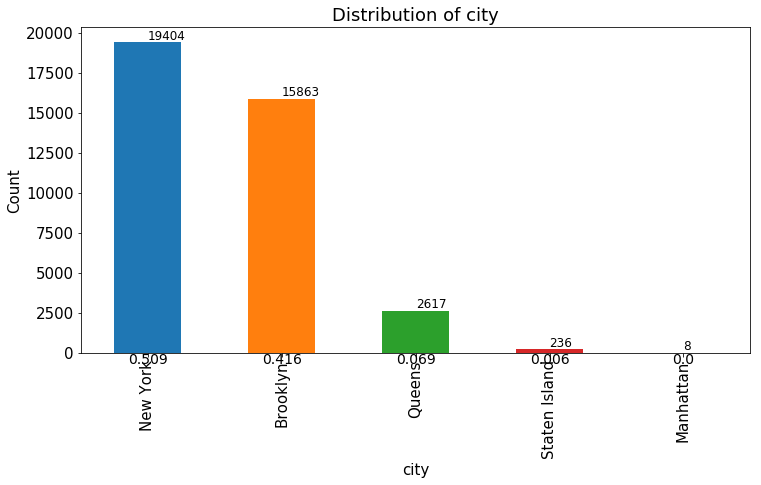

In [180]:
get_bar_plot('city', ny_revenue_75_df)
#ny_revenue_75_df.city.value_counts().plot(kind = 'bar')

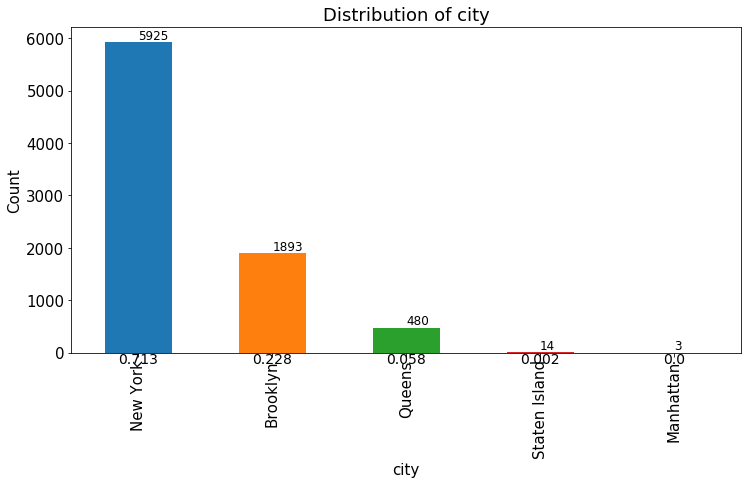

In [181]:
get_bar_plot('city', nan_zip)

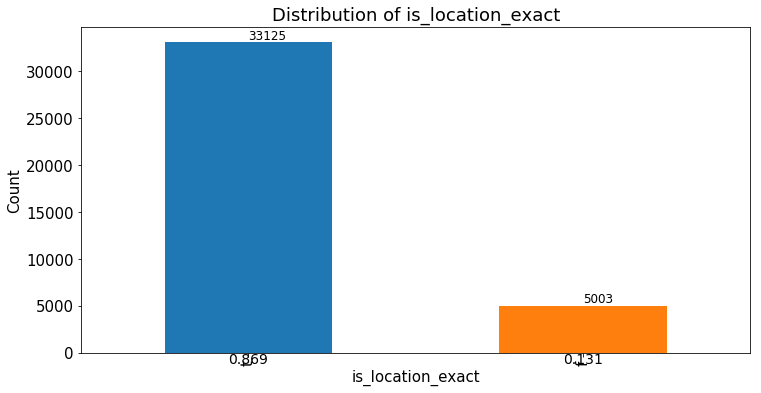

In [189]:
#is location accurate?
get_bar_plot('is_location_exact', ny_revenue_75_df)

In [190]:
def get_two_group_plot(v1, v2, kind, agg_v, df):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(111)
    gb = df.groupby([v1, v2])[v2].agg(agg_v)
    gb.plot(kind = kind, ax = ax, width = 1)
    plt.title('Distribution of ' + v1 +" and "+ v2, fontsize = 18)
    plt.xlabel(v1 + "+" + v2, fontsize = 15)
    plt.xticks(rotation = 'vertical')
    plt.ylabel('count', fontsize = 15)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 12)
    print(df.groupby([v1, v2])[v2].agg(agg_v))

In [ ]:
#how is nan_zipcode related with not exact location?
get_two_group_plot('zipcode', '')

In [177]:
#check whether those area with same city and same neighourhood have same zipcode
ny_revenue_75_df[(ny_revenue_75_df.neighbourhood_cleansed=='Ditmars Steinway')&(ny_revenue_75_df.city=='Queens')].sample(5)
#notice even for the same state, city, market and neighbourhood, the zipcode can be different.
#zipcode is even smaller than the neighbourhood_cleansed.


,id,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,is_location_exact,price,weekly_price,monthly_price,review_scores_value,reviews_per_month,zipcode1
152,4874722,Ditmars Steinway,Queens,Queens,NY,11102,New York,t,$70.00,NaN,NaN,9.0,0.11,11102
88,14090966,Ditmars Steinway,Queens,Queens,NY,11105,New York,t,$85.00,NaN,NaN,NaN,NaN,11105
150,3040654,Ditmars Steinway,Queens,Queens,NY,11105,New York,t,$50.00,$300.00,"$1,050.00",10.0,0.57,11105
63,12067200,Ditmars Steinway,Queens,Queens,NY,11102,New York,t,$68.00,NaN,NaN,NaN,NaN,11102
273,14856378,Ditmars Steinway,Queens,Queens,NY,11102,New York,t,$153.00,NaN,NaN,10.0,3.33,11102


In [122]:
print(len(ny_revenue_75_df.groupby('neighbourhood_cleansed')['zipcode'].agg('count')))
print(len(ny_revenue_75_df.zipcode1.unique()))

177
167


In [353]:
#get the map of neighbourhood and zipcode
#map_zip_area_167 = ny_revenue_75_df[['zipcode', 'neighbourhood_cleansed']]
ny_zip_nei = ny_revenue_75_df.groupby('zipcode')['neighbourhood_cleansed'].unique()
nyzip_nei_df = ny_zip_nei.to_frame().reset_index()
nyzip_nei_df.head()
#here we can see there are crossover of zipcode and neighbourhood_cleansed. but at least we only need to know the zipcode.

,zipcode,neighbourhood_cleansed
0,10000,[Hell's Kitchen]
1,10001,"[Gramercy, Hell's Kitchen]"
2,10002,"[Greenwich Village, Little Italy]"
3,10003,"[Gramercy, Greenwich Village, Hell's Kitchen, ..."
4,10009,[Gramercy]


In [229]:
#extract rows of revenue_df which are within 25 zipcodes.
print(len(ny_revenue_75_df.zipcode[ny_revenue_75_df.zipcode.isin(ny_zip)].unique()))
#there are 19 zipcode within cost_df/167 unique cleaned zipcode. Since this df contains revenue information in NYC, we can drop 
#all variables related to location/neighbourhood.
ny_revenue_df = ny_revenue_75_df[ny_revenue_75_df.zipcode.isin(ny_zip)].drop(['id', 'neighbourhood_cleansed', 
                                                                              'neighbourhood_group_cleansed','city','state',
                                                                              'market','is_location_exact', 'zipcode1'], axis = 1)

19


In [230]:
print(ny_revenue_df.shape)
ny_revenue_df.sample(5)

(1532, 6)


,zipcode,price,weekly_price,monthly_price,review_scores_value,reviews_per_month
19041,10003,$550.00,NaN,NaN,10.0,0.46
24445,10013,$135.00,NaN,NaN,9.0,0.27
23858,11434,$75.00,NaN,NaN,NaN,NaN
23238,10036,$60.00,NaN,NaN,9.0,0.12
17411,10003,$155.00,NaN,NaN,10.0,0.89


In [211]:
#clean the $ sign
def remove_dollar_sign(df, var):
    df[var] = df[var].str.replace('$', '')
    df[var] = df[var].str.replace(',', '')
    df[var] = df[var].astype(float)

In [231]:
remove_dollar_sign(ny_revenue_df, 'price')
remove_dollar_sign(ny_revenue_df, 'weekly_price')
remove_dollar_sign(ny_revenue_df, 'monthly_price')
#ny_revenue_df['price1'], ny_revenue_df['wprice1'],ny_revenue_df['mprice1'] = ny_revenue_df['price'][1:], ny_revenue_df['wprice1'],ny_revenue_df['mprice1']

In [232]:
#first groupby zipcode to get the avg_price then set as index
ny_revenue_gdf = ny_revenue_df.groupby('zipcode').agg('mean')

,price,weekly_price,monthly_price,review_scores_value,reviews_per_month
zipcode,,,,,
10003.0,249.852273,1346.627907,3878.666667,9.412621,1.167067
10011.0,284.818182,1731.888889,5814.100000,9.333333,1.454655
10013.0,169.581395,861.250000,2616.666667,9.283784,1.422400
10014.0,187.625000,1456.666667,4309.800000,9.125000,1.420000
10021.0,225.000000,NaN,NaN,NaN,NaN
10022.0,100.000000,NaN,NaN,NaN,NaN
10023.0,150.000000,NaN,2499.000000,10.000000,0.480000
10025.0,103.000000,875.000000,NaN,8.500000,0.240000
10036.0,206.267564,1225.266667,4096.786517,9.303263,1.936186


In [224]:
def get_price_percent(df):
    df['w_percent'] = df.weekly_price/(df.price*7)
    df['m_percent'] = df.monthly_price/(df.price*30)

In [233]:
get_price_percent(ny_revenue_gdf)

In [234]:
ny_revenue_gdf

,price,weekly_price,monthly_price,review_scores_value,reviews_per_month,w_percent,m_percent
zipcode,,,,,,,
10003.0,249.852273,1346.627907,3878.666667,9.412621,1.167067,0.769957,0.517461
10011.0,284.818182,1731.888889,5814.100000,9.333333,1.454655,0.868669,0.680446
10013.0,169.581395,861.250000,2616.666667,9.283784,1.422400,0.725526,0.514338
10014.0,187.625000,1456.666667,4309.800000,9.125000,1.420000,1.109102,0.765676
10021.0,225.000000,NaN,NaN,NaN,NaN,NaN,NaN
10022.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
10023.0,150.000000,NaN,2499.000000,10.000000,0.480000,NaN,0.555333
10025.0,103.000000,875.000000,NaN,8.500000,0.240000,1.213592,NaN
10036.0,206.267564,1225.266667,4096.786517,9.303263,1.936186,0.848597,0.662051


## Combine cost_data, occupancy_rate and revenue_data
* Cost_data(cost_2017): only take 2017 cost into consideration if assume this investment is short-term/one-time.(25 zipcode)
* Revenue_data(ny_revenue_gdf): only take price into consideration(only profit)(19 zipcode)
* occupancy_rate(16 zipcode)

In [281]:
print(cost_2017.to_frame().reset_index().head())
print(occupancy_rate.to_frame().reset_index().head())
#print(ny_revenue_gdf.head())


   zipcode          2017
0    10025  1.358600e+06
1    10023  2.013717e+06
2    10128  1.648883e+06
3    10011  2.373500e+06
4    10003  2.016550e+06
   zipcode  availability_365
0  10003.0          0.502762
1  10011.0          0.325644
2  10013.0          0.523373
3  10014.0          0.454429
4  10023.0          0.342466


In [284]:
#total_df = pd.merge(cost_2017.to_frame().reset_index(), occupancy_rate.to_frame().reset_index(), on = 'zipcode', how = 'inner')
total_df = pd.merge(total_df, ny_revenue_gdf.reset_index(), on = 'zipcode', how = 'inner')

In [288]:
total_df = total_df.set_index('zipcode')
total_df = total_df.rename(columns = {'2017':'cost', 'availability_365':'occupancy_rate'})
total_df

,cost,occupancy_rate,price,weekly_price,monthly_price,review_scores_value,reviews_per_month,w_percent,m_percent
zipcode,,,,,,,,,
10025,1.358600e+06,0.079452,103.000000,875.000000,NaN,8.500000,0.240000,1.213592,NaN
10023,2.013717e+06,0.342466,150.000000,NaN,2499.000000,10.000000,0.480000,NaN,0.555333
10011,2.373500e+06,0.325644,284.818182,1731.888889,5814.100000,9.333333,1.454655,0.868669,0.680446
10003,2.016550e+06,0.502762,249.852273,1346.627907,3878.666667,9.412621,1.167067,0.769957,0.517461
11201,1.402783e+06,0.317186,167.936170,1121.428571,2833.333333,9.739130,0.444074,0.953958,0.562383
11215,1.050483e+06,0.587973,131.604938,781.722222,3264.933333,9.483333,1.325645,0.848559,0.826953
10014,2.473150e+06,0.454429,187.625000,1456.666667,4309.800000,9.125000,1.420000,1.109102,0.765676
10036,1.729167e+06,0.531213,206.267564,1225.266667,4096.786517,9.303263,1.936186,0.848597,0.662051
11434,3.716333e+05,0.771720,75.658537,404.375000,1210.000000,9.000000,3.375769,0.763534,0.533097


In [290]:
total_df['cap_rate1'] = (total_df.price*365*total_df.occupancy_rate)/total_df.cost
total_df['cap_rate2'] = (total_df.weekly_price*52*total_df.occupancy_rate)/total_df.cost
total_df['cap_rate3'] = (total_df.monthly_price*12*total_df.occupancy_rate)/total_df.cost
total_df

,cost,occupancy_rate,price,weekly_price,monthly_price,review_scores_value,reviews_per_month,w_percent,m_percent,cap_rate1,cap_rate2,cap_rate3
zipcode,,,,,,,,,,,,
10025,1.358600e+06,0.079452,103.000000,875.000000,NaN,8.500000,0.240000,1.213592,NaN,0.002199,0.002661,NaN
10023,2.013717e+06,0.342466,150.000000,NaN,2499.000000,10.000000,0.480000,NaN,0.555333,0.009311,NaN,0.005100
10011,2.373500e+06,0.325644,284.818182,1731.888889,5814.100000,9.333333,1.454655,0.868669,0.680446,0.014263,0.012356,0.009572
10003,2.016550e+06,0.502762,249.852273,1346.627907,3878.666667,9.412621,1.167067,0.769957,0.517461,0.022737,0.017458,0.011604
11201,1.402783e+06,0.317186,167.936170,1121.428571,2833.333333,9.739130,0.444074,0.953958,0.562383,0.013860,0.013186,0.007688
11215,1.050483e+06,0.587973,131.604938,781.722222,3264.933333,9.483333,1.325645,0.848559,0.826953,0.026886,0.022752,0.021929
10014,2.473150e+06,0.454429,187.625000,1456.666667,4309.800000,9.125000,1.420000,1.109102,0.765676,0.012583,0.013918,0.009503
10036,1.729167e+06,0.531213,206.267564,1225.266667,4096.786517,9.303263,1.936186,0.848597,0.662051,0.023129,0.019573,0.015103
11434,3.716333e+05,0.771720,75.658537,404.375000,1210.000000,9.000000,3.375769,0.763534,0.533097,0.057345,0.043665,0.030152


In [297]:
total_df['mean_cap'] = total_df[['cap_rate1','cap_rate2','cap_rate3']].mean(skipna = True, axis = 1)

## Result Summary
The metrics to get the most profit area are: average_cap_rate(cap_mean), occupancy_rate(rate_occ)
metrics of review_score and review_monthly indicates the popularity, can be used as supplementary metrics.
We can see the **zipcode(10303, 10306, 10312, 11434)** are among top. Which means those areas are largely possible to gain most profit in New York City.

In [344]:
rank = pd.DataFrame({'rate_ooc':  total_df['occupancy_rate'].rank(ascending=False),
             'cap_mean':total_df['mean_cap'].rank(ascending=False),
             'review_score': total_df['review_scores_value'].rank(ascending=False), 
             'reviews_monthly':total_df['reviews_per_month'].rank(ascending=False)})
rank.sort_values(['cap_mean', 'rate_ooc','review_score', 'reviews_monthly'])

,cap_mean,rate_ooc,review_score,reviews_monthly
zipcode,,,,
10303,1.0,2.0,15.0,13.0
10306,2.0,3.0,13.5,10.0
10312,3.0,6.0,1.5,1.0
11434,4.0,1.0,13.5,2.0
10308,5.0,5.0,5.0,8.0
11215,6.0,4.0,7.0,7.0
10036,7.0,7.0,10.0,3.0
11217,8.0,10.0,6.0,9.0
11231,9.0,13.0,4.0,12.0


In [354]:
#check with neighbourhood those most profit areas are:
nyzip_nei_df[nyzip_nei_df.zipcode.isin(['10303', '10306', '10312', '11434'])]

,zipcode,neighbourhood_cleansed
145,10303,[Mariners Harbor]
148,10306,"[Bay Terrace, Staten Island, Oakwood, Midland ..."
152,10312,"[Arden Heights, Eltingville, Woodrow]"
248,11434,"[Springfield Gardens, St. Albans]"


In [343]:
def get_final_result(df, var):
    df[var].sort_values().plot(kind = 'bar')
    plt.title(var +' for each zipcode area')
    plt.ylabel(var)

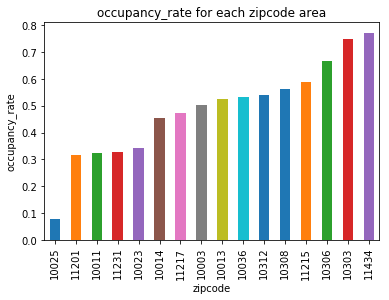

In [332]:
get_final_result(total_df, 'occupancy_rate')

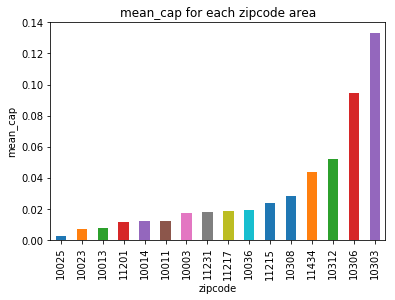

In [312]:
get_final_result(total_df, 'mean_cap')

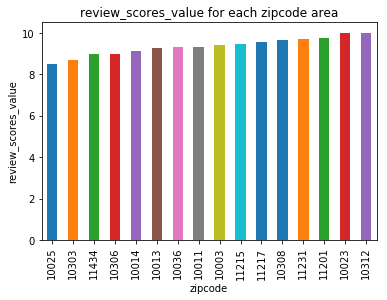

In [313]:
get_final_result(total_df, 'review_scores_value')

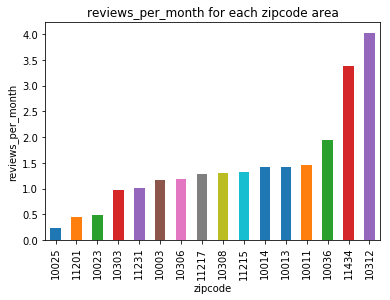

In [314]:
get_final_result(total_df, 'reviews_per_month')

# 4. Next Steps:

Since this is a real investment problem, other factors should also be taken into. 
* From available data:
Notice there are lots of features about property performance we are not take into consideration. Such as review_features, property_features, etc, which indicate different parts of property analysis.
You can invest to the middle income neighbourhood if you want to rent out your property in a tranditional way(which largely depends on area profit), however, if you want to invest property and list it on Airbnb, traffic/popularity you also need to put on top. High-return Airbnb neighbourhoods are ususally central and tourist destinations, with walkable distance of convenient services such as Starbucks, public transit.